In [40]:
import warnings
warnings.filterwarnings('ignore') # :clown:

In [41]:
import numpy as np
import pandas as pd

In [42]:
from glob import glob
import matplotlib.pyplot as plt

In [43]:
from scipy import signal

In [44]:
files = glob('../data/ecg_preprocessed/*.csv')
hz = 1000

In [45]:
df = pd.read_csv(files[0])
df.head()

,timestamp,signal,signal_normalised,subject_id,category,code,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,...,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,2018-05-04 14:24:58+00:00,0.000036,0.328144,30159,NaN,NaN,0.000036,-0.000040,81.854144,0.776591,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,2018-05-04 14:24:58.001000+00:00,0.000028,0.326347,30159,NaN,NaN,0.000028,-0.000043,81.854144,0.776591,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,2018-05-04 14:24:58.002000+00:00,0.000023,0.325000,30159,NaN,NaN,0.000023,-0.000046,81.854144,0.776591,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,2018-05-04 14:24:58.003000+00:00,0.000019,0.323952,30159,NaN,NaN,0.000019,-0.000049,81.854144,0.776591,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,2018-05-04 14:24:58.004000+00:00,0.000013,0.322455,30159,NaN,NaN,0.000013,-0.000052,81.854144,0.776591,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [46]:
tasks = df['category'].unique()
tasks

array([nan, 'Lying_supine', 'Standing', 'Sitting', 'TA', 'Recov1',
       'SSST_Sing_countdown', 'Recov2', 'Pasat', 'Recov3', 'Raven',
       'Walking_own_pace', 'Walking_fast_pace', 'Cycling',
       'stairs_up_and_down', 'Recov_standing', 'Dishes', 'Vacuum',
       'Recov4', 'TA_repeat', 'Recov5', 'Pasat_repeat', 'Treadmill1',
       'Treadmill2', 'Treadmill3', 'Treadmill4', 'Recov6'], dtype=object)

In [47]:
x = np.arange(0, len(df))
y = df['signal']

## Spectogram

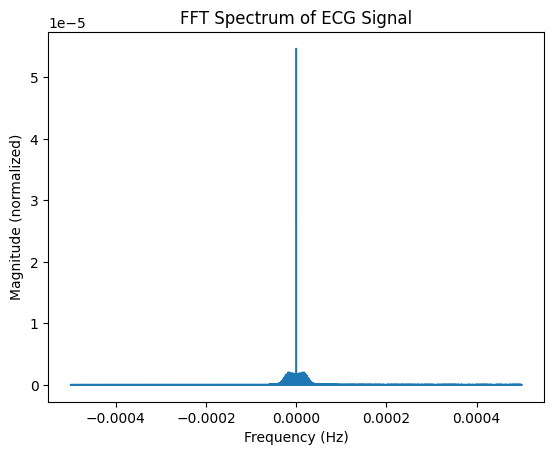

In [48]:
# Calculate the Fast Fourier Transform
fft_data = np.fft.fft(y)

# Calculate the absolute values and normalize
fft_abs = np.abs(fft_data) / len(y)

# Calculate frequencies based on sampling rate
sampling_rate = 1000 # Replace with your actual sampling rate
frequencies = np.fft.fftfreq(len(y), sampling_rate)

# Plot the FFT spectrum
plt.plot(frequencies, fft_abs)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (normalized)")
plt.title("FFT Spectrum of ECG Signal")
plt.show()

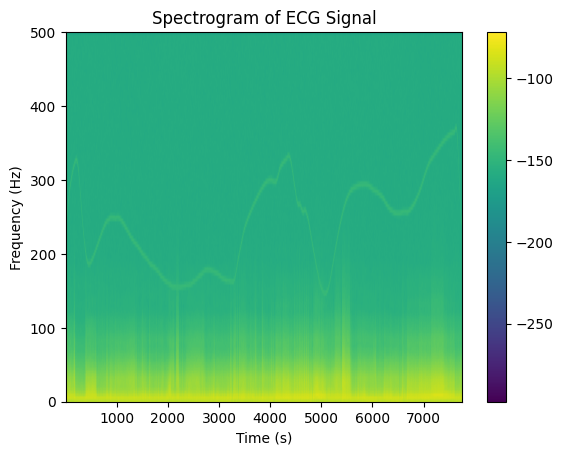

In [49]:
# Calculate spectrogram using Welch method
plt.specgram(y, Fs=1000)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of ECG Signal")
plt.colorbar()
plt.show()

In [50]:
import pywt

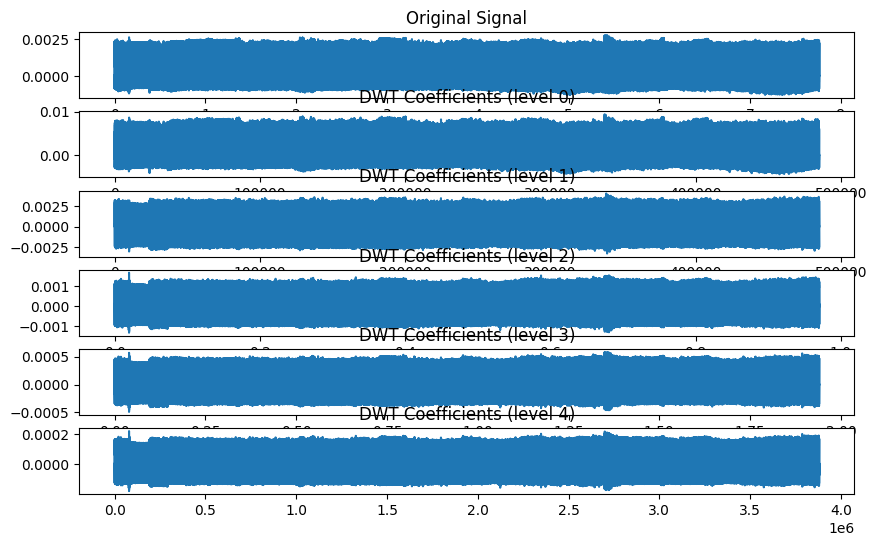

In [51]:
level = 4
coefficients = pywt.wavedec(y, 'haar', level=level)

# Plot the original signal
plt.figure(figsize=(10, 6))
plt.subplot(level+2, 1, 1)
plt.plot(y)
plt.title('Original Signal')

# Plot the DWT coefficients
for i in range(level+1):
    plt.subplot(level+2, 1, i+2)
    plt.plot(coefficients[i])
    plt.title('DWT Coefficients (level {})'.format(i))


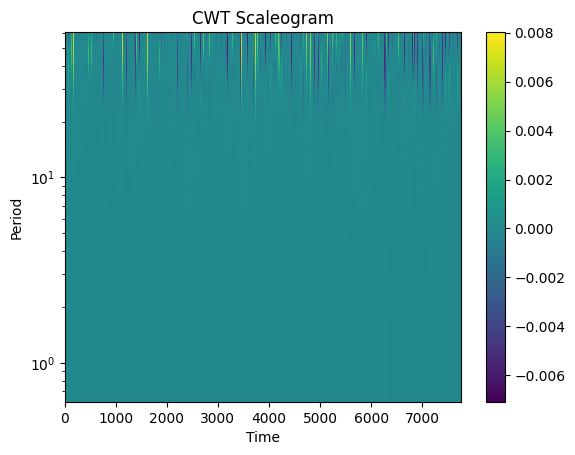

In [53]:
# Choose a wavelet
wavelet = 'morl'

# Calculate CWT coefficients
coef, freqs = pywt.cwt(y, np.arange(1, 50), wavelet)

# Define periods (inverse of frequencies)
periods = 1.0 / freqs

# Create the scaleogram plot
plt.pcolormesh(np.linspace(0, len(y)/1000, len(y)), periods, coef, shading='auto')
plt.xlabel('Time')
plt.ylabel('Period')
plt.title('CWT Scaleogram')
plt.colorbar()
plt.yscale('log')  # Optional: Use logarithmic scale for period axis
plt.show()